In [5]:
# Dataframe fake pour visualisations
!pip install Faker

import pandas as pd
import random
from datetime import datetime, timedelta
from faker import Faker

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_theme(style="whitegrid", palette="viridis")

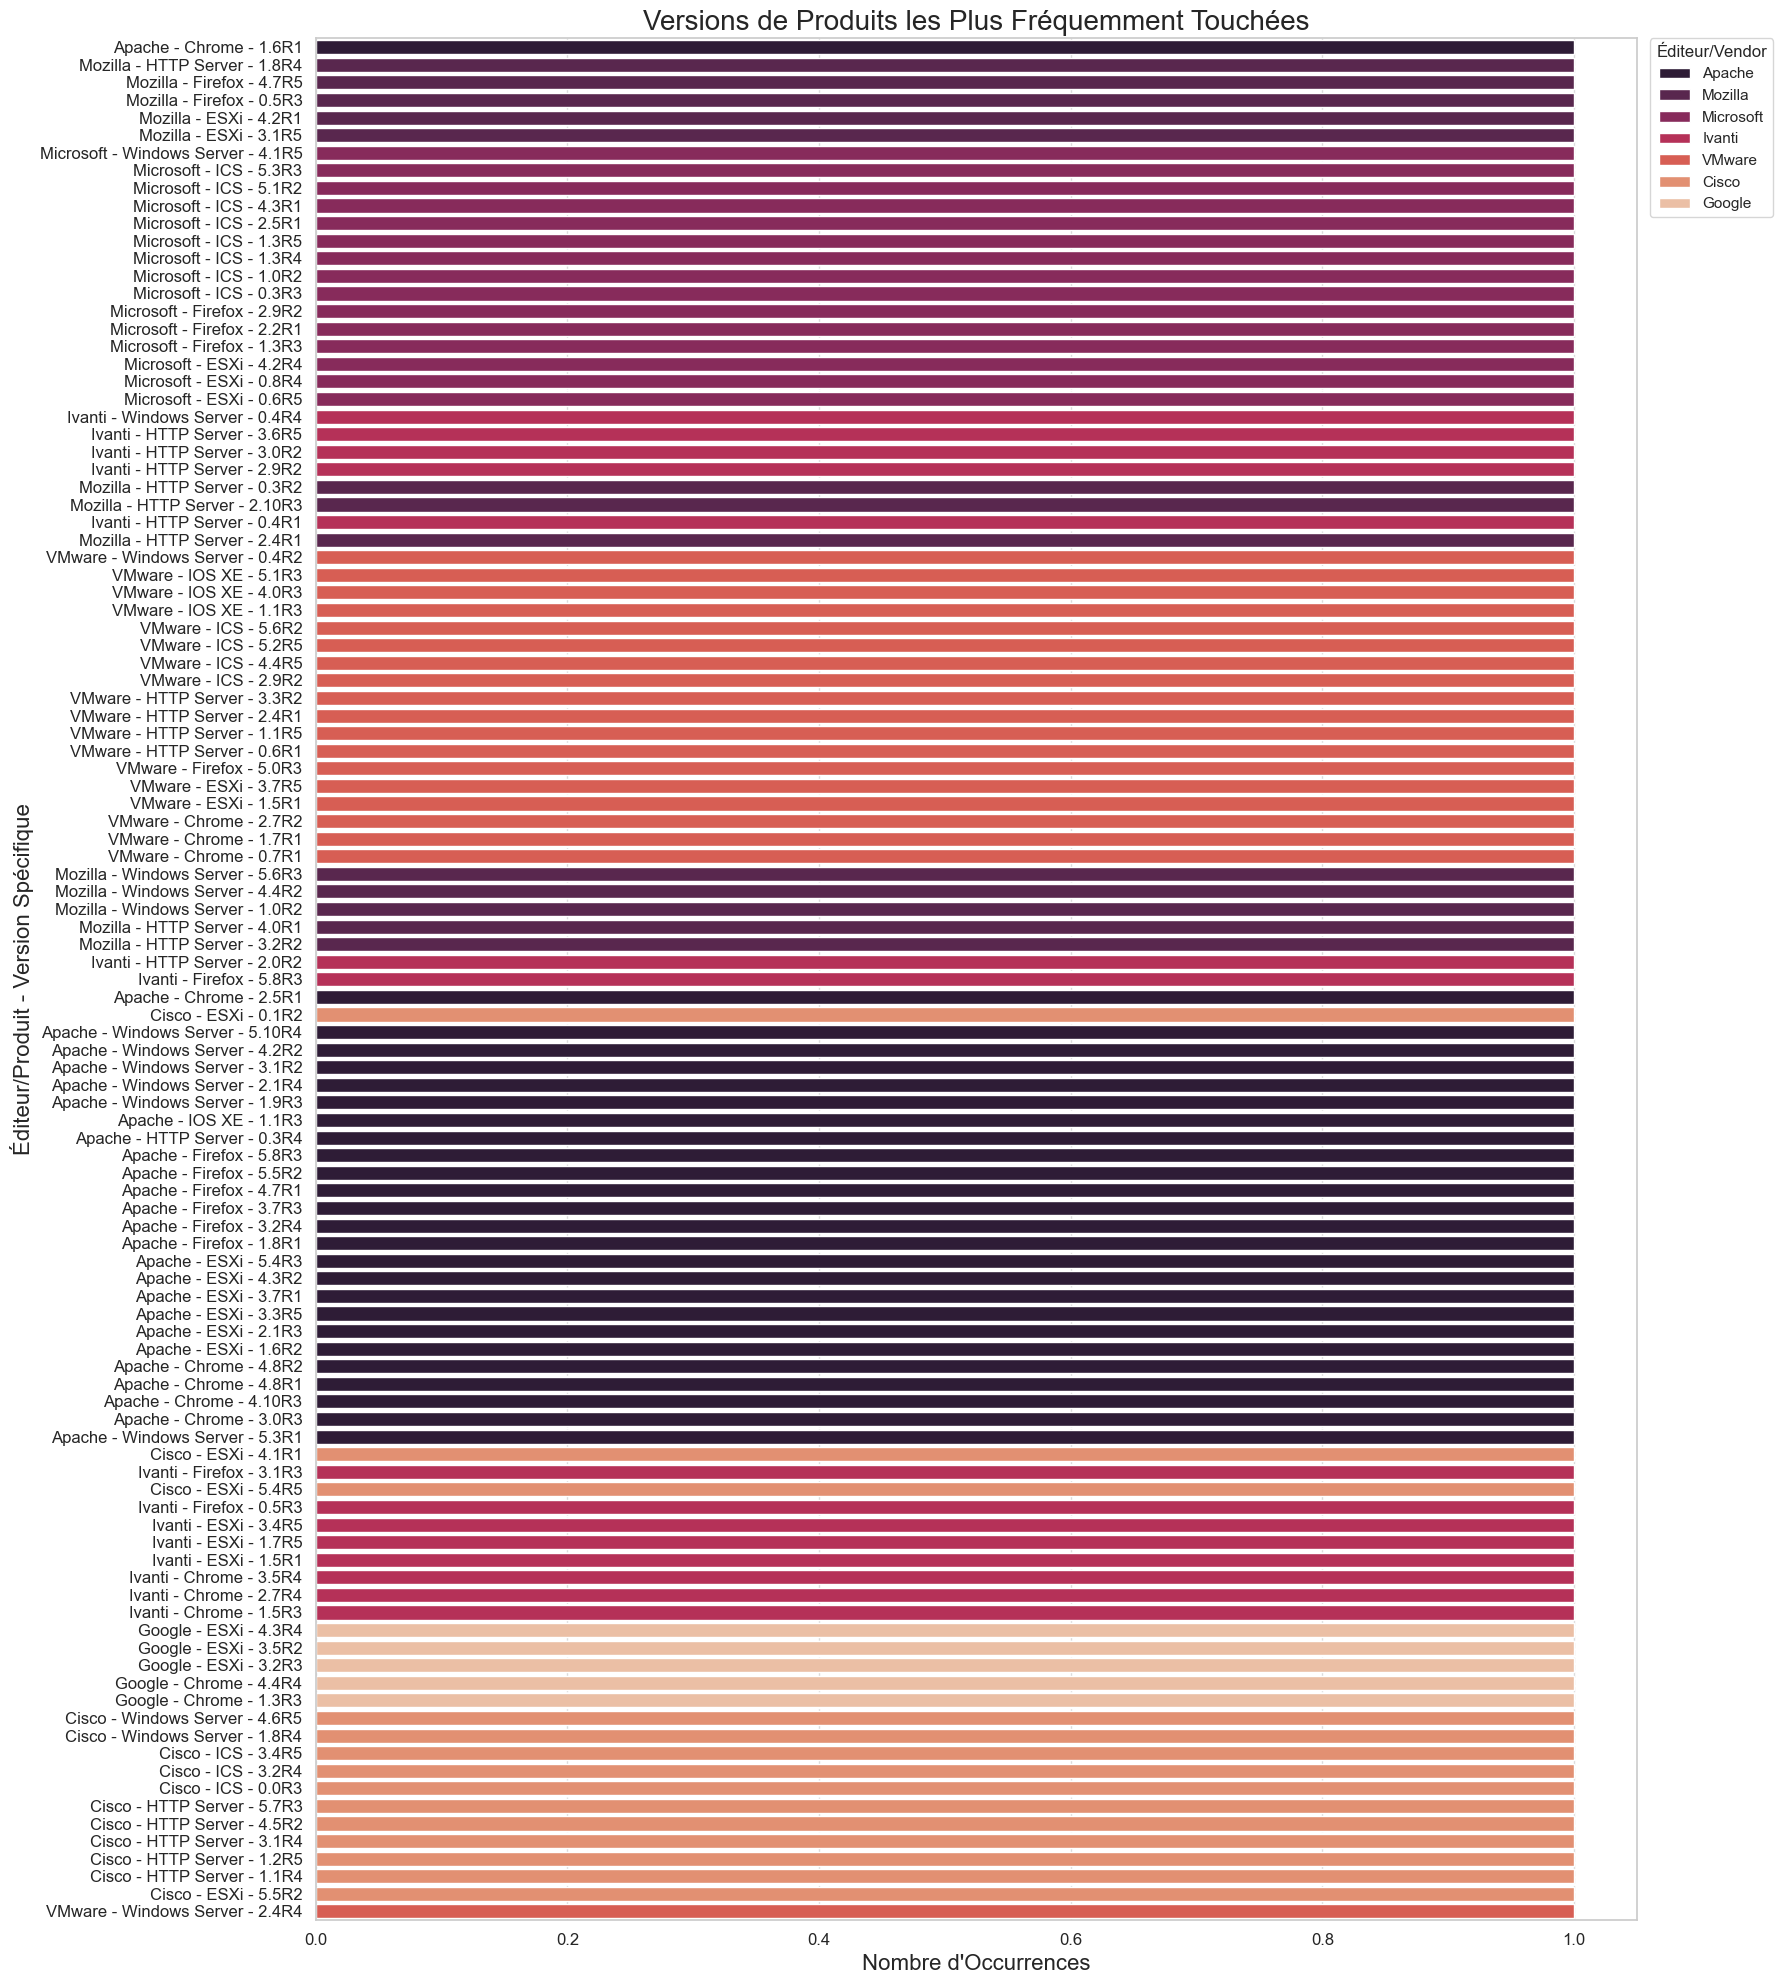

In [376]:
df['Versions affectées_list'] = df['Versions affectées'].apply( lambda x: [v.strip() for v in x.split(',')] if isinstance(x, str) else [])
df_exploded = df.explode('Versions affectées_list')

df_exploded['Produit_Version_Spécifique'] = \
    df_exploded['Éditeur/Vendor'] + ' - ' + \
    df_exploded['Produit'] + ' - ' + \
    df_exploded['Versions affectées_list']

version_counts = df_exploded.groupby(['Produit_Version_Spécifique', 'Éditeur/Vendor']).size().reset_index(name='Nombre d\'Occurrences')
version_counts_df = version_counts.sort_values(by='Nombre d\'Occurrences', ascending=False)
plt.figure(figsize=(18, 20))

sns.barplot(
    x='Nombre d\'Occurrences',
    y='Produit_Version_Spécifique',
    data=version_counts_df,
    hue='Éditeur/Vendor',
    palette='rocket',
    dodge=False # Set dodge to False to prevent splitting bars for each hue category if y-labels are unique.
)

plt.title('Versions de Produits les Plus Fréquemment Touchées', fontsize=20)
plt.xlabel('Nombre d\'Occurrences', fontsize=16)
plt.ylabel('Éditeur/Produit - Version Spécifique', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Éditeur/Vendor', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

# Visualisations avec données DataFrame_Complet.csv

In [29]:
df_complet = pd.read_csv("DataFrame_complet.csv", usecols=["Link", "Title", "Type", "Published", "Summary", "CVE_id", "Description", "CVSS_score", "Base_severity", "EPSS_score", "EPSS_percentile", "CWE", "vendor", "product", "version"])
df_complet.head(2)

,Link,Title,Type,Published,Summary,CVE_id,Description,CVSS_score,Base_severity,EPSS_score,EPSS_percentile,CWE,vendor,product,version
0,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Vulnérabilité dans Grafana,Avis,2025-06-16 00:00:00+00:00,Une vulnérabilité a été découverte dans Grafan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Vulnérabilité dans PostgreSQL JDBC,Avis,2025-06-16 00:00:00+00:00,Une vulnérabilité a été découverte dans Postgr...,CVE-2025-49146,pgjdbc is an open source postgresql JDBC Drive...,8.2,HIGH,0.00014,0.01669,CWE-287,pgjdbc,pgjdbc,">= 42.7.4, < 42.7.7"


## Histogramme des scores CVSS 
### Observer la distribution des vulnérabilités selon leur niveau de gravité (critique, élevée, moyenne).

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

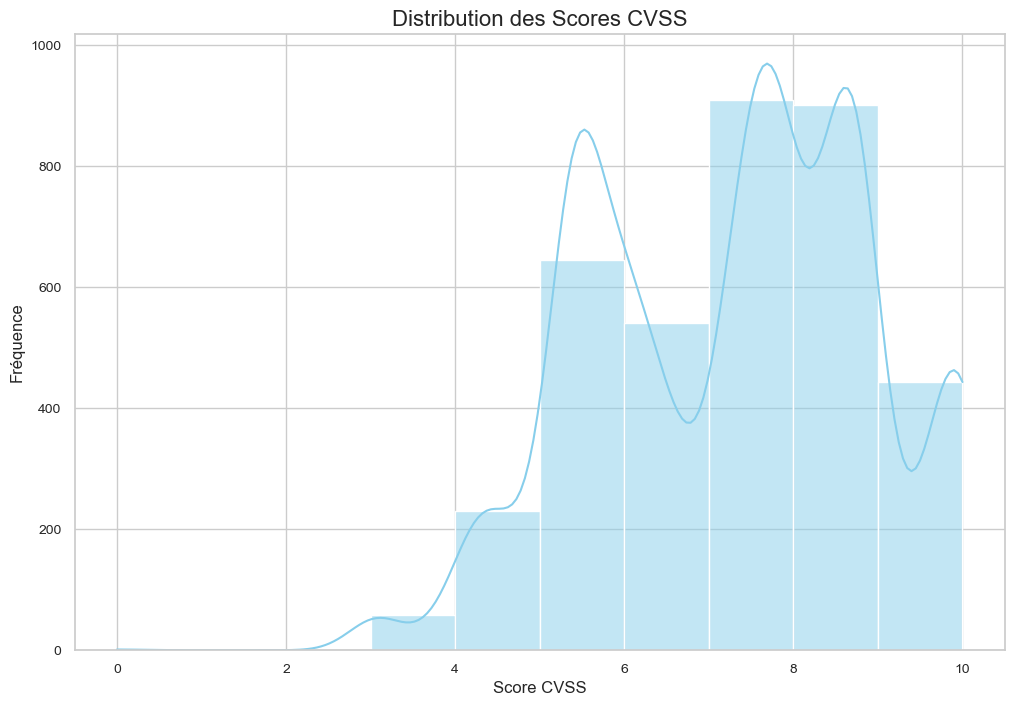

In [33]:
plt.figure(figsize=(12, 8))
sns.histplot(df_complet['CVSS_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution des Scores CVSS', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

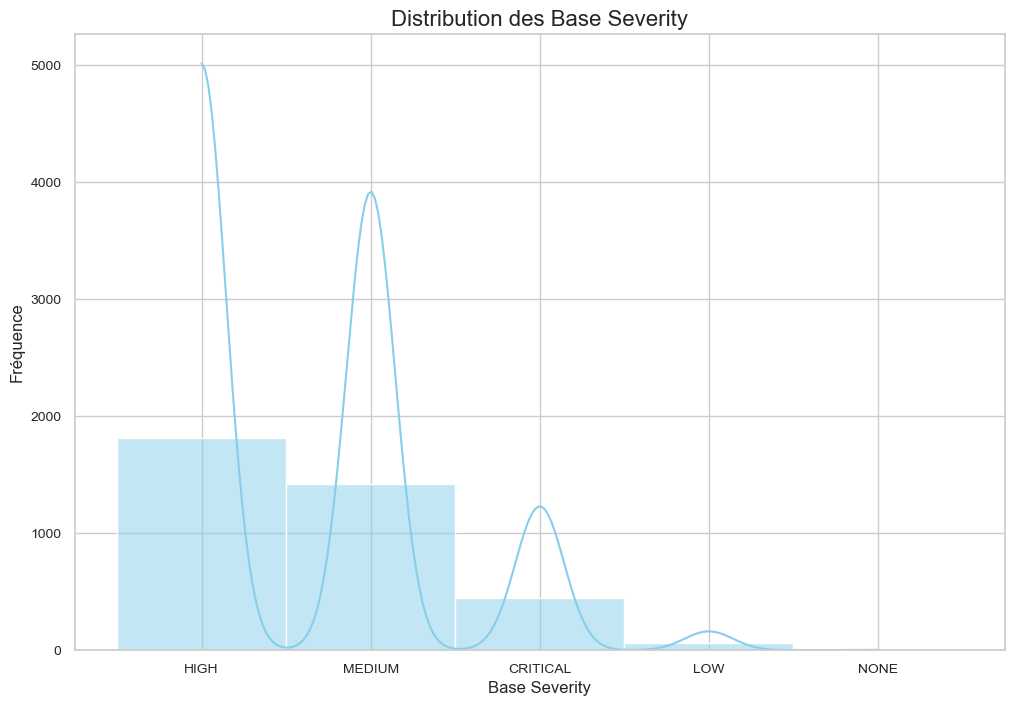

In [41]:
plt.figure(figsize=(12, 8))
sns.histplot(df_complet['Base_severity'], bins=10, kde=True, color='skyBlue')
plt.title('Distribution des Base Severity', fontsize=16)
plt.xlabel('Base Severity', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

## Diagramme circulaire des types de vulnérabilités (CWE)
### Identifier les catégories de faiblesses les plus fréquentes (par exemple : Injection SQL, Débordement de mémoire, Authentification contournée).

(-1.0999999833610257,
 1.0999996769897766,
 -1.0999999603750379,
 1.0999999919919539)

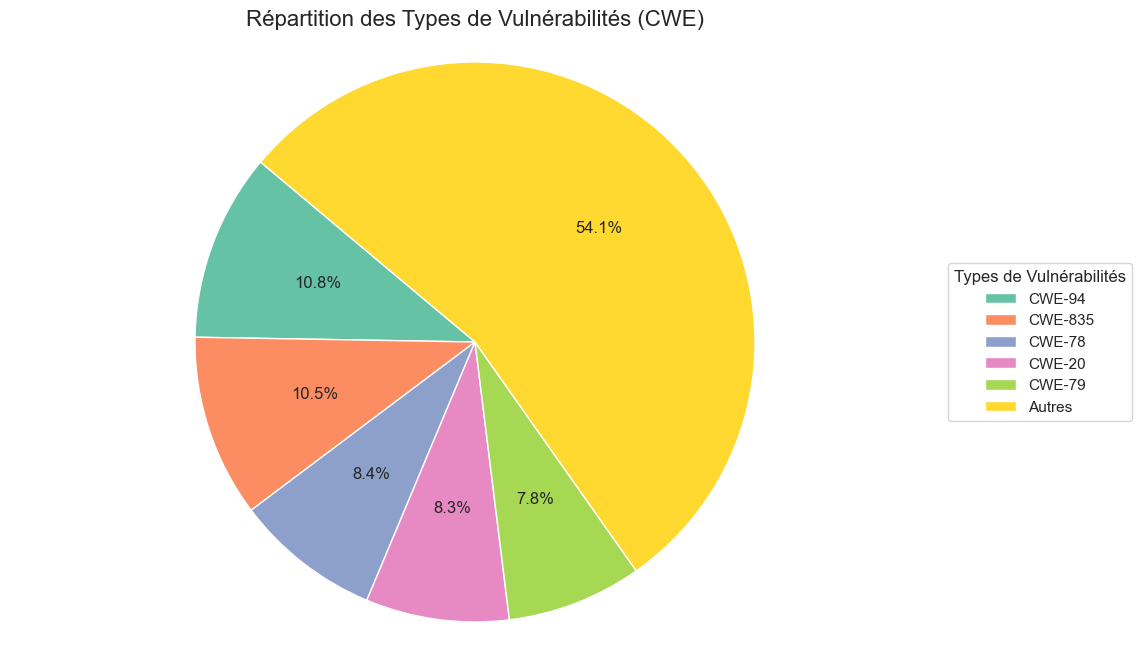

In [47]:
plt.figure(figsize=(12, 8))
cwe_counts = df_complet['CWE'].value_counts()

top_n_cwe = 5
if len(cwe_counts) > top_n_cwe:
    other_cwe_count = cwe_counts.iloc[top_n_cwe:].sum()
    cwe_counts = cwe_counts.iloc[:top_n_cwe]
    cwe_counts['Autres'] = other_cwe_count

wedges, texts, autotexts = plt.pie(
    cwe_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)

plt.legend(wedges, cwe_counts.index, title="Types de Vulnérabilités", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Types de Vulnérabilités (CWE)', fontsize=16)
plt.axis('equal') 

# Courbe des scores EPSS
### Comprendre la probabilité d'exploitation des vulnérabilités recensées et les prioriser en fonction de leur risque réel

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

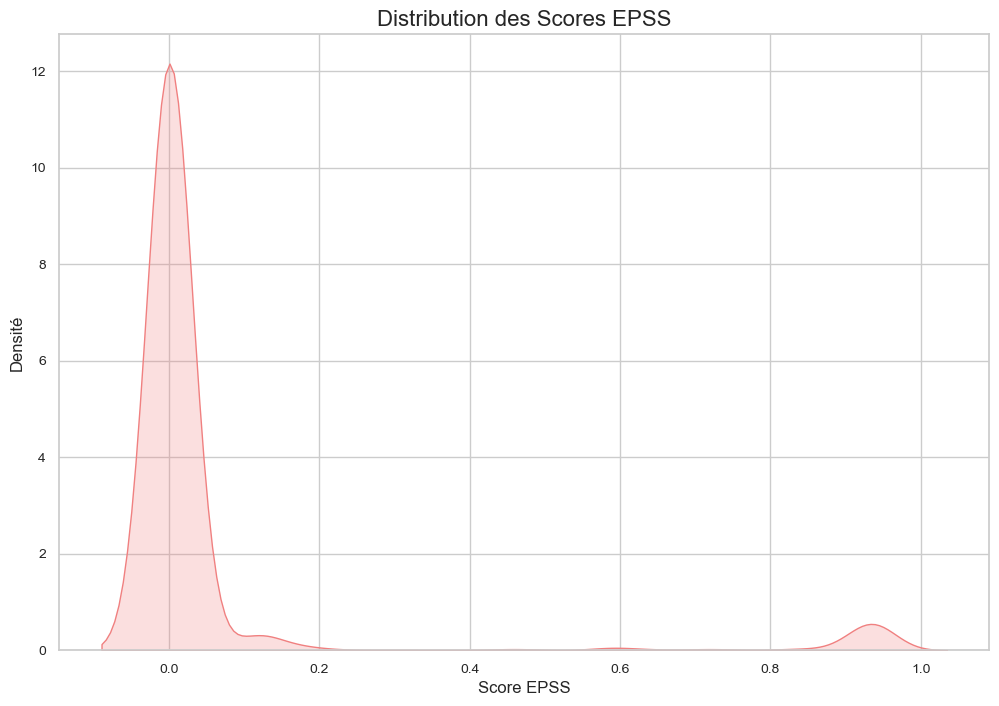

In [49]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_complet['EPSS_score'], fill=True, color='lightcoral')
plt.title('Distribution des Scores EPSS', fontsize=16)
plt.xlabel('Score EPSS', fontsize=12)
plt.ylabel('Densité', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Classement des produits ou éditeurs les plus affectés
### Mettre en lumière les systèmes les plus vulnérables et cibler les actions à entreprendre

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Linux'),
  Text(0, 1, 'Cisco Adaptive Security Appliance (ASA) Software'),
  Text(0, 2, 'Cisco IOS XE Software'),
  Text(0, 3, 'Red Hat OpenShift Container Platform 4'),
  Text(0, 4, 'Cisco Firepower Threat Defense Software'),
  Text(0, 5, 'Cisco Unified Computing System (Managed)'),
  Text(0, 6, 'Cisco Unified Computing System (Standalone)')])

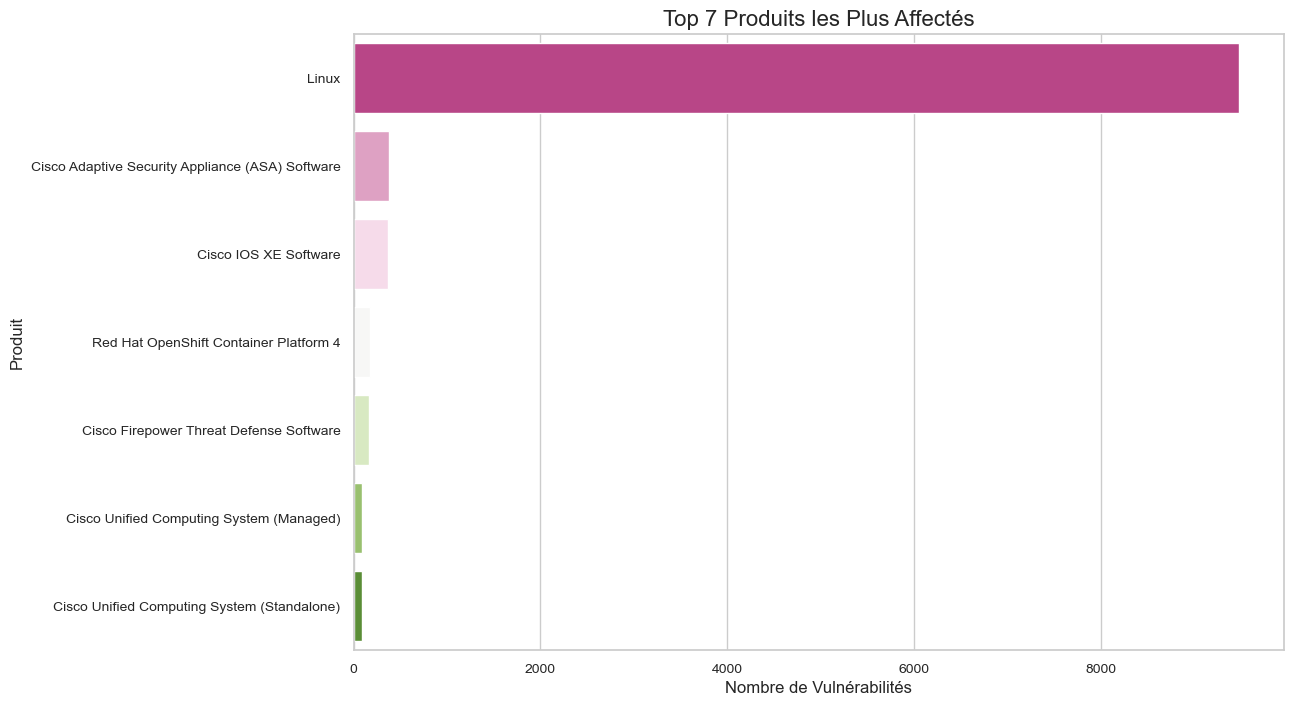

In [56]:
plt.figure(figsize=(12, 8))
top_affected_products = df_complet['product'].value_counts().head(7)
sns.barplot(x=top_affected_products.values, y=top_affected_products.index, palette='PiYG', hue=top_affected_products.index, legend=False)
plt.title('Top 7 Produits les Plus Affectés', fontsize=16)
plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
plt.ylabel('Produit', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Heatmap des corrélations entre CVSS et EPSS
## Analyser la relation entre le score CVSS (niveau de gravité) et le score EPSS (probabilité d'exploitation)

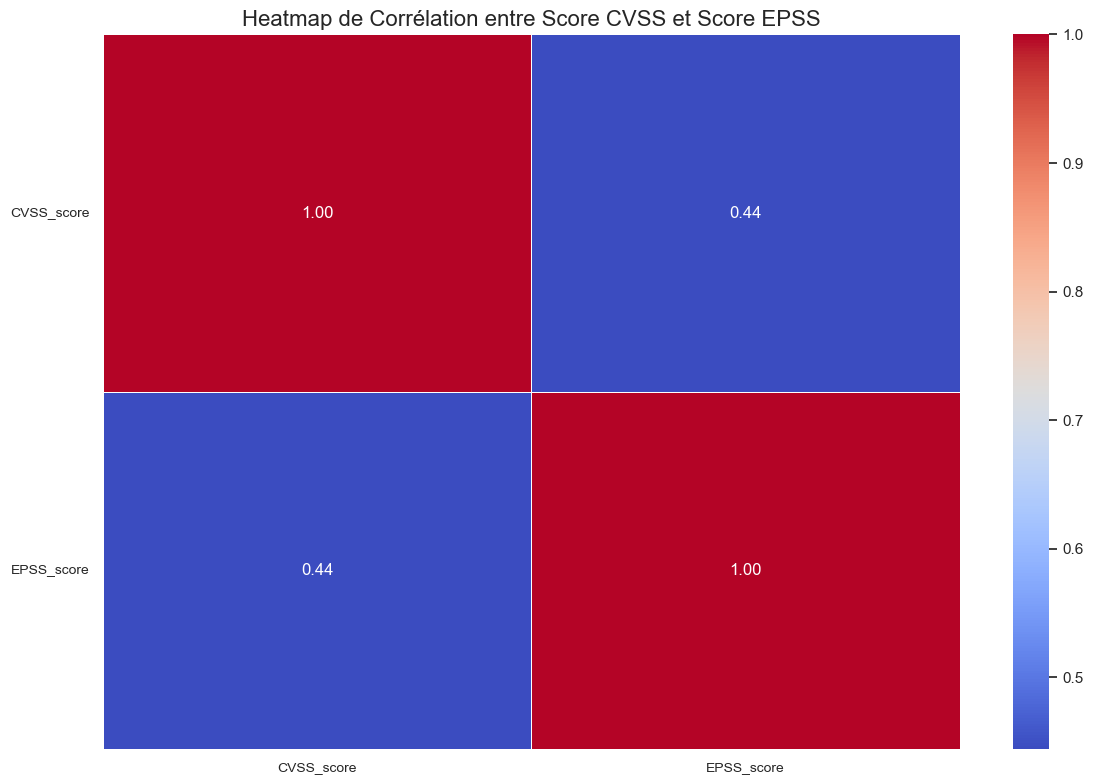

In [60]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_complet[['CVSS_score', 'EPSS_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation entre Score CVSS et Score EPSS', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

# Nuage de points entre Score CVSS et Score EPSS
### Visualiser comment la probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

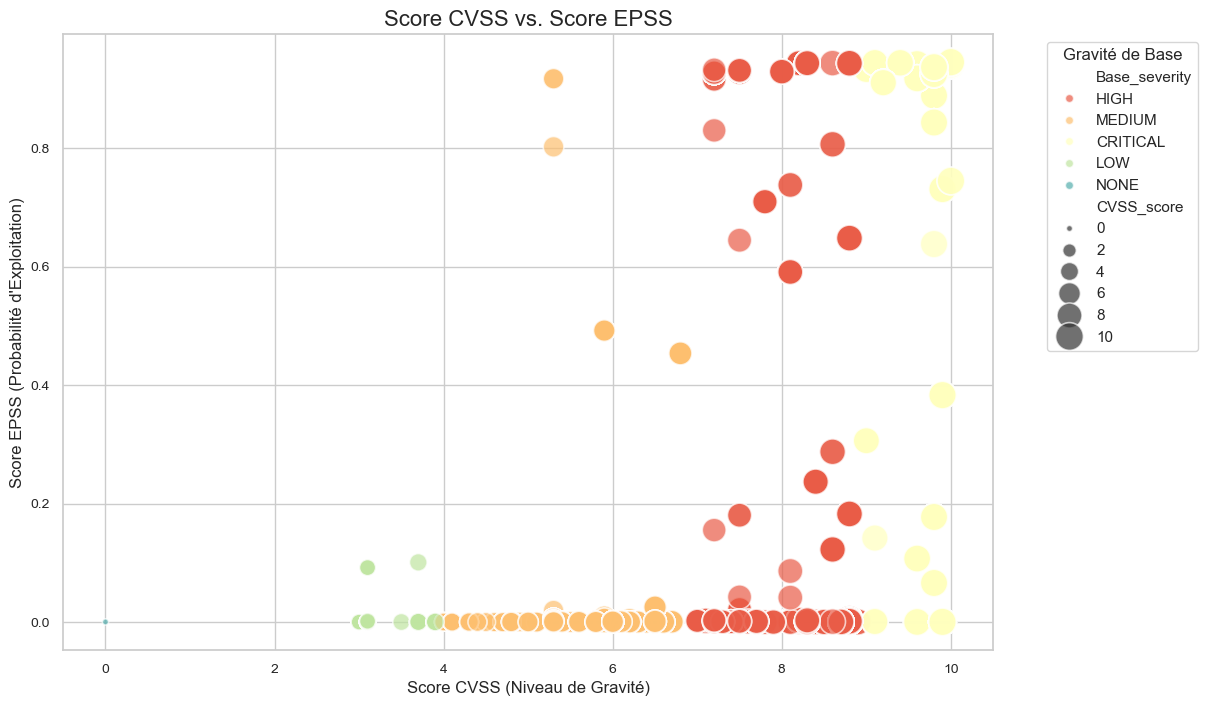

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_complet, x='CVSS_score', y='EPSS_score', hue='Base_severity',
                size='CVSS_score', sizes=(20, 400), alpha=0.7, palette='Spectral')
plt.title('Score CVSS vs. Score EPSS', fontsize=16)
plt.xlabel('Score CVSS (Niveau de Gravité)', fontsize=12)
plt.ylabel('Score EPSS (Probabilité d\'Exploitation)', fontsize=12)
plt.legend(title='Gravité de Base', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Courbe cumulative des vulnérabilités en fonction du temps
### Montrer l’évolution temporelle du nombre de vulnérabilités détectées

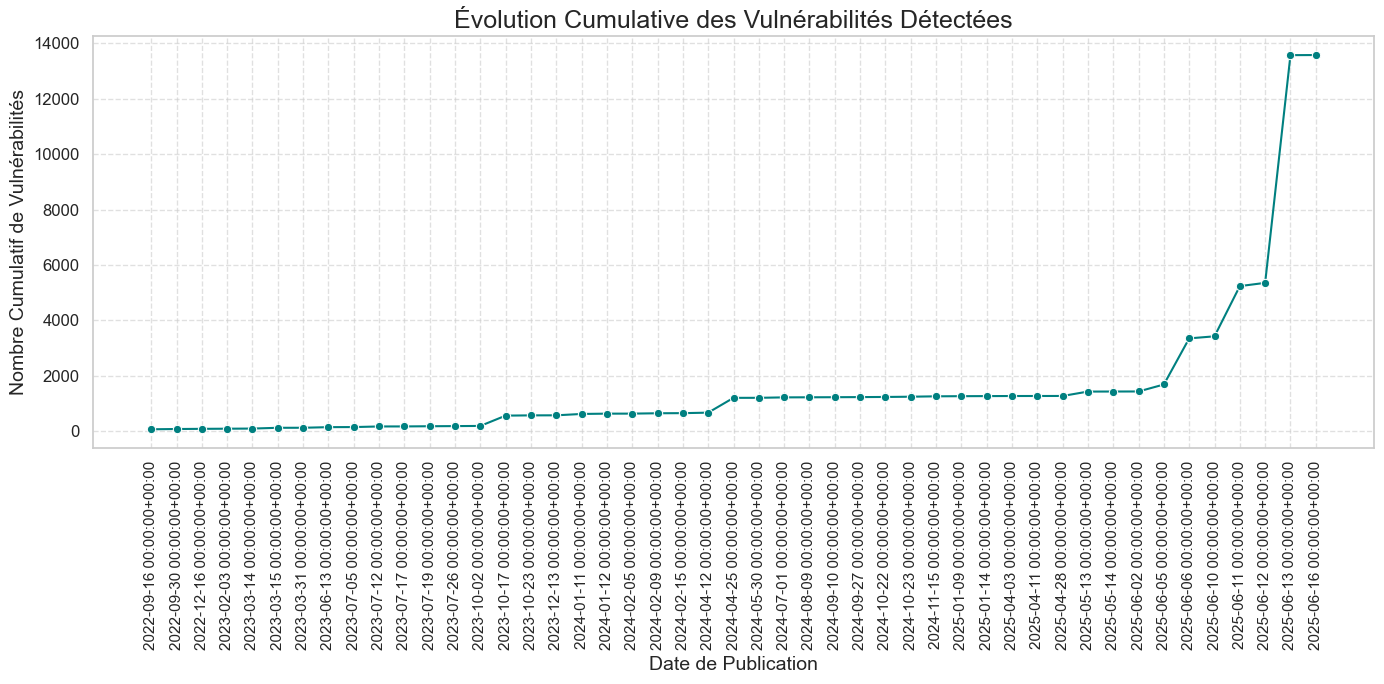

In [67]:
import matplotlib.dates as mdates

# Sort by date
df_sorted_by_date = df_complet.sort_values('Published')
df_sorted_by_date['Cumulative Vulnérabilités'] = range(1, len(df_sorted_by_date) + 1)

cumulative_df = df_sorted_by_date.groupby('Published').size().reset_index(name='Daily Vulnerabilities')
cumulative_df['Cumulative Vulnérabilités'] = cumulative_df['Daily Vulnerabilities'].cumsum()

plt.figure(figsize=(14, 7))

sns.lineplot(data=cumulative_df, x='Published', y='Cumulative Vulnérabilités',
             marker='o', linestyle='-', color='teal') # Changed linestyle for visual distinction

plt.title('Évolution Cumulative des Vulnérabilités Détectées', fontsize=18)
plt.xlabel('Date de Publication', fontsize=14)
plt.ylabel('Nombre Cumulatif de Vulnérabilités', fontsize=14)

# Y-axis ticks
plt.yticks(fontsize=12) 
plt.xticks(rotation=90) 

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Boxplot des scores CVSS par éditeurs
### Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

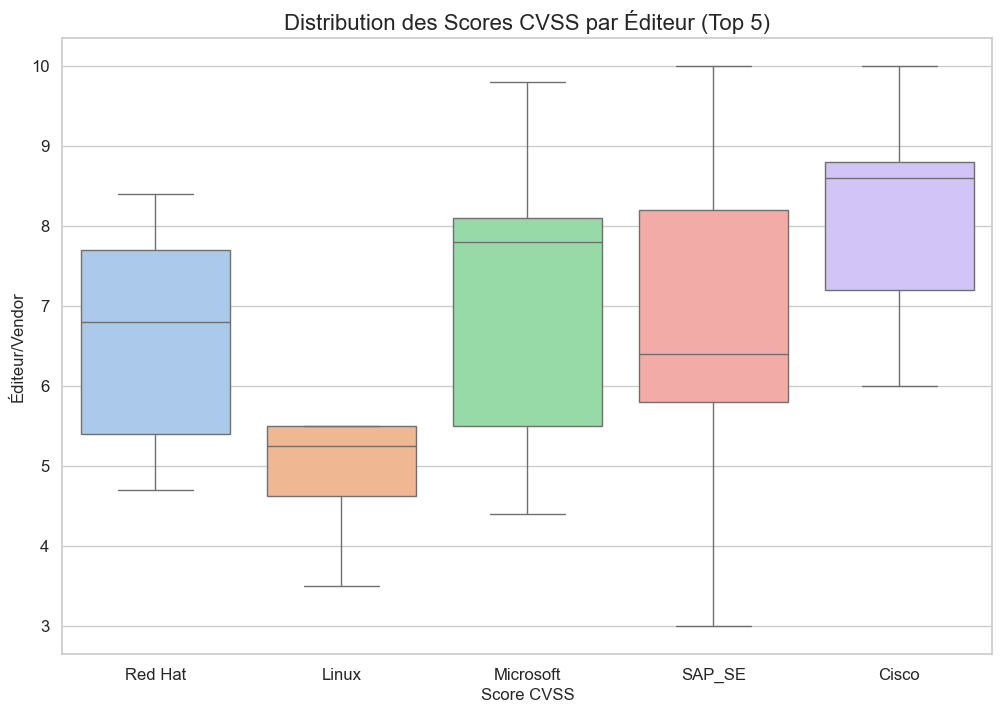

In [72]:
top_n_vendors = df_complet['vendor'].value_counts().head(5).index
df_top_vendors = df_complet[df_complet['vendor'].isin(top_n_vendors)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_vendors, x='vendor', y='CVSS_score', hue='vendor', palette='pastel', legend=False)
plt.title('Distribution des Scores CVSS par Éditeur (Top 5)', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Éditeur/Vendor', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualisations particulières pour un type défini CWE
### Focus on 'Cross-Site Scriping' - create a bar plot of affected products for this CWE

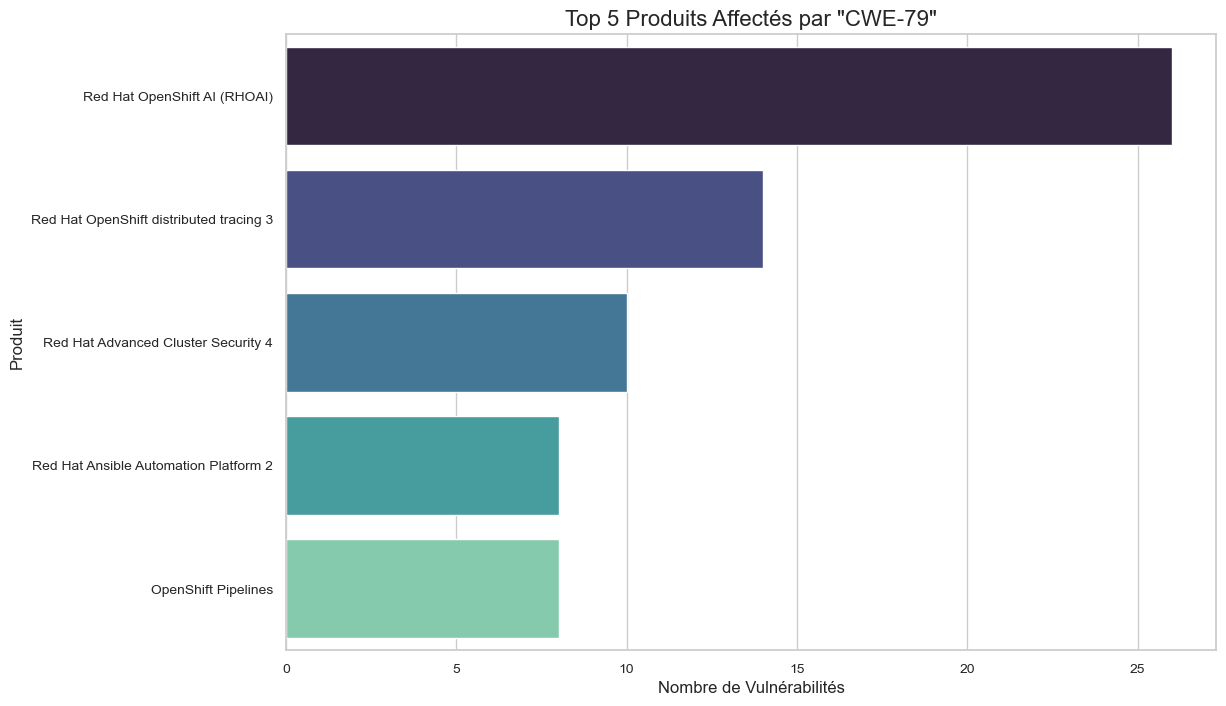

In [97]:
plt.figure(figsize=(12, 8))
specific_cwe = 'CWE-79'
df_specific_cwe = df_complet[df_complet['CWE'] == specific_cwe]

if not df_specific_cwe.empty:
    affected_products_cwe = df_specific_cwe['product'].value_counts().head(5)
    sns.barplot(x=affected_products_cwe.values, y=affected_products_cwe.index, hue=affected_products_cwe.index, legend=False, palette='mako')
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)
    plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
    plt.ylabel('Produit', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
else:
    plt.text(0.5, 0.5, f'No data for CWE: "{specific_cwe}"', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=15)
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)

### Focus on 'Injection SQL' - create a bar plot of affected products for this CWE

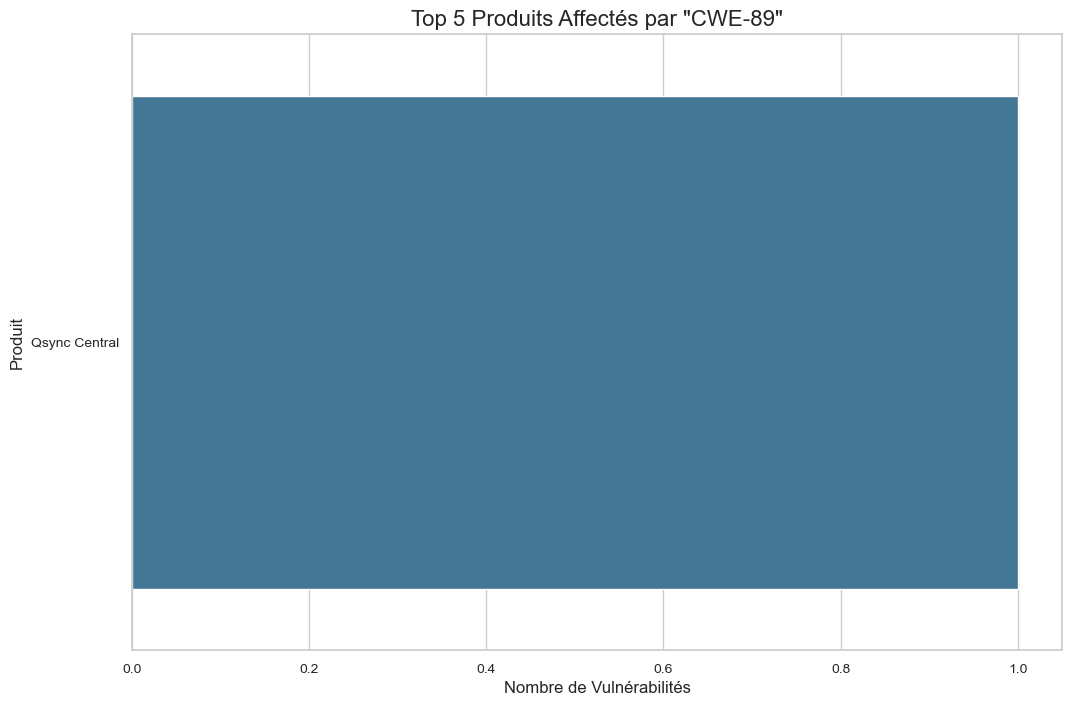

In [100]:
plt.figure(figsize=(12, 8))
specific_cwe = 'CWE-89'
df_specific_cwe = df_complet[df_complet['CWE'] == specific_cwe]

if not df_specific_cwe.empty:
    affected_products_cwe = df_specific_cwe['product'].value_counts().head(5)
    sns.barplot(x=affected_products_cwe.values, y=affected_products_cwe.index, hue=affected_products_cwe.index, legend=False, palette='mako')
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)
    plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
    plt.ylabel('Produit', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
else:
    plt.text(0.5, 0.5, f'No data for CWE: "{specific_cwe}"', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=15)
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)

# Montrer l'évolution temporelle du nombre de vulnérabilités détectées (Monthly Count)
### Group by month and count vulnerabilities

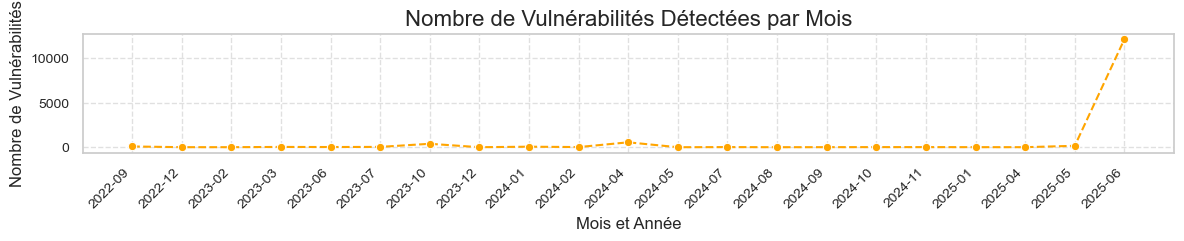

In [110]:
df_complet['Published'] = pd.to_datetime(df_complet['Published'], errors='coerce')
df_complet.dropna(subset=['Published'], inplace=True)
df_complet['Mois_Année'] = df_complet['Published'].dt.tz_localize(None).dt.to_period('M')

monthly_counts = df_complet['Mois_Année'].value_counts().sort_index()
monthly_counts_df = monthly_counts.rename_axis('Mois_Année').reset_index(name='Nombre de Vulnérabilités')
monthly_counts_df['Mois_Année'] = monthly_counts_df['Mois_Année'].astype(str)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
sns.lineplot(data=monthly_counts_df, x='Mois_Année', y='Nombre de Vulnérabilités', marker='o', linestyle='--', color='orange')
plt.title('Nombre de Vulnérabilités Détectées par Mois', fontsize=16)
plt.xlabel('Mois et Année', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Analyser le nombre de vulnérabilités par éditeur et distinguer les types de bulletins (avis ou alertes) 

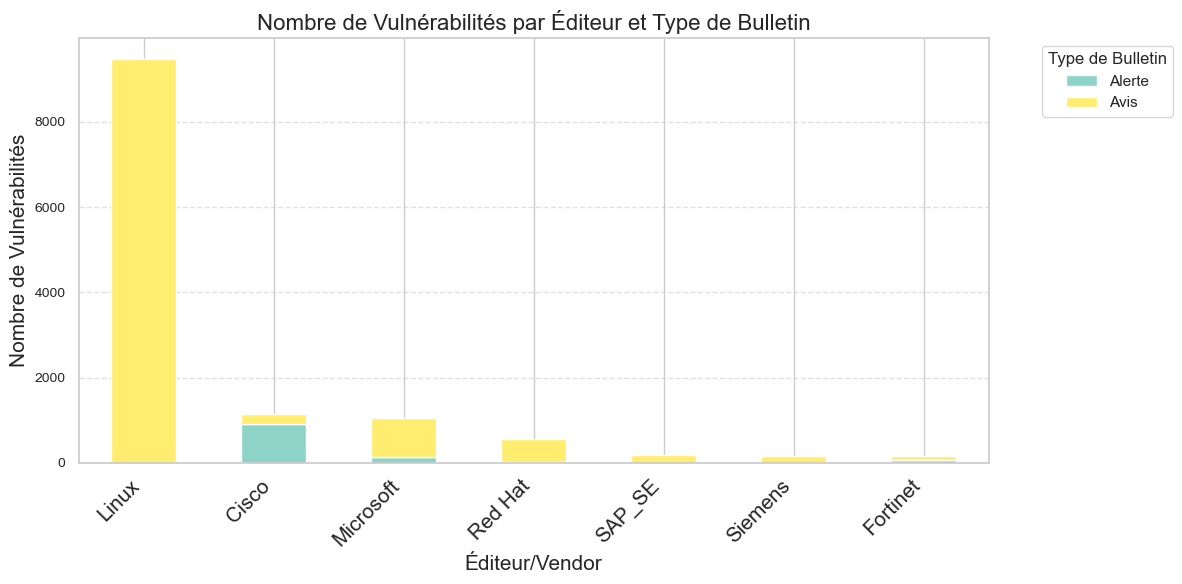

In [113]:
df_filtered_bulletins = df_complet[df_complet['Type'].isin(['Avis', 'Alerte'])]
# Count vulnerabilities by vendor and bulletin type
vendor_bulletin_counts = df_filtered_bulletins.groupby(['vendor', 'Type']).size().unstack(fill_value=0)

# Sort by total vulnerabilities for better visualization if needed, or by one type
vendor_bulletin_counts['Total'] = vendor_bulletin_counts.sum(axis=1)
vendor_bulletin_counts = vendor_bulletin_counts.sort_values('Total', ascending=False).head(7) # Top 7 vendors by total
vendor_bulletin_counts = vendor_bulletin_counts.drop(columns='Total')

plt.figure(figsize=(12, 8))
vendor_bulletin_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3', ax=plt.gca())
plt.title('Nombre de Vulnérabilités par Éditeur et Type de Bulletin', fontsize=16)
plt.xlabel('Éditeur/Vendor', fontsize=15)
plt.ylabel('Nombre de Vulnérabilités', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.legend(title='Type de Bulletin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Visualiser les versions les plus fréquemment touchées des produits concernés

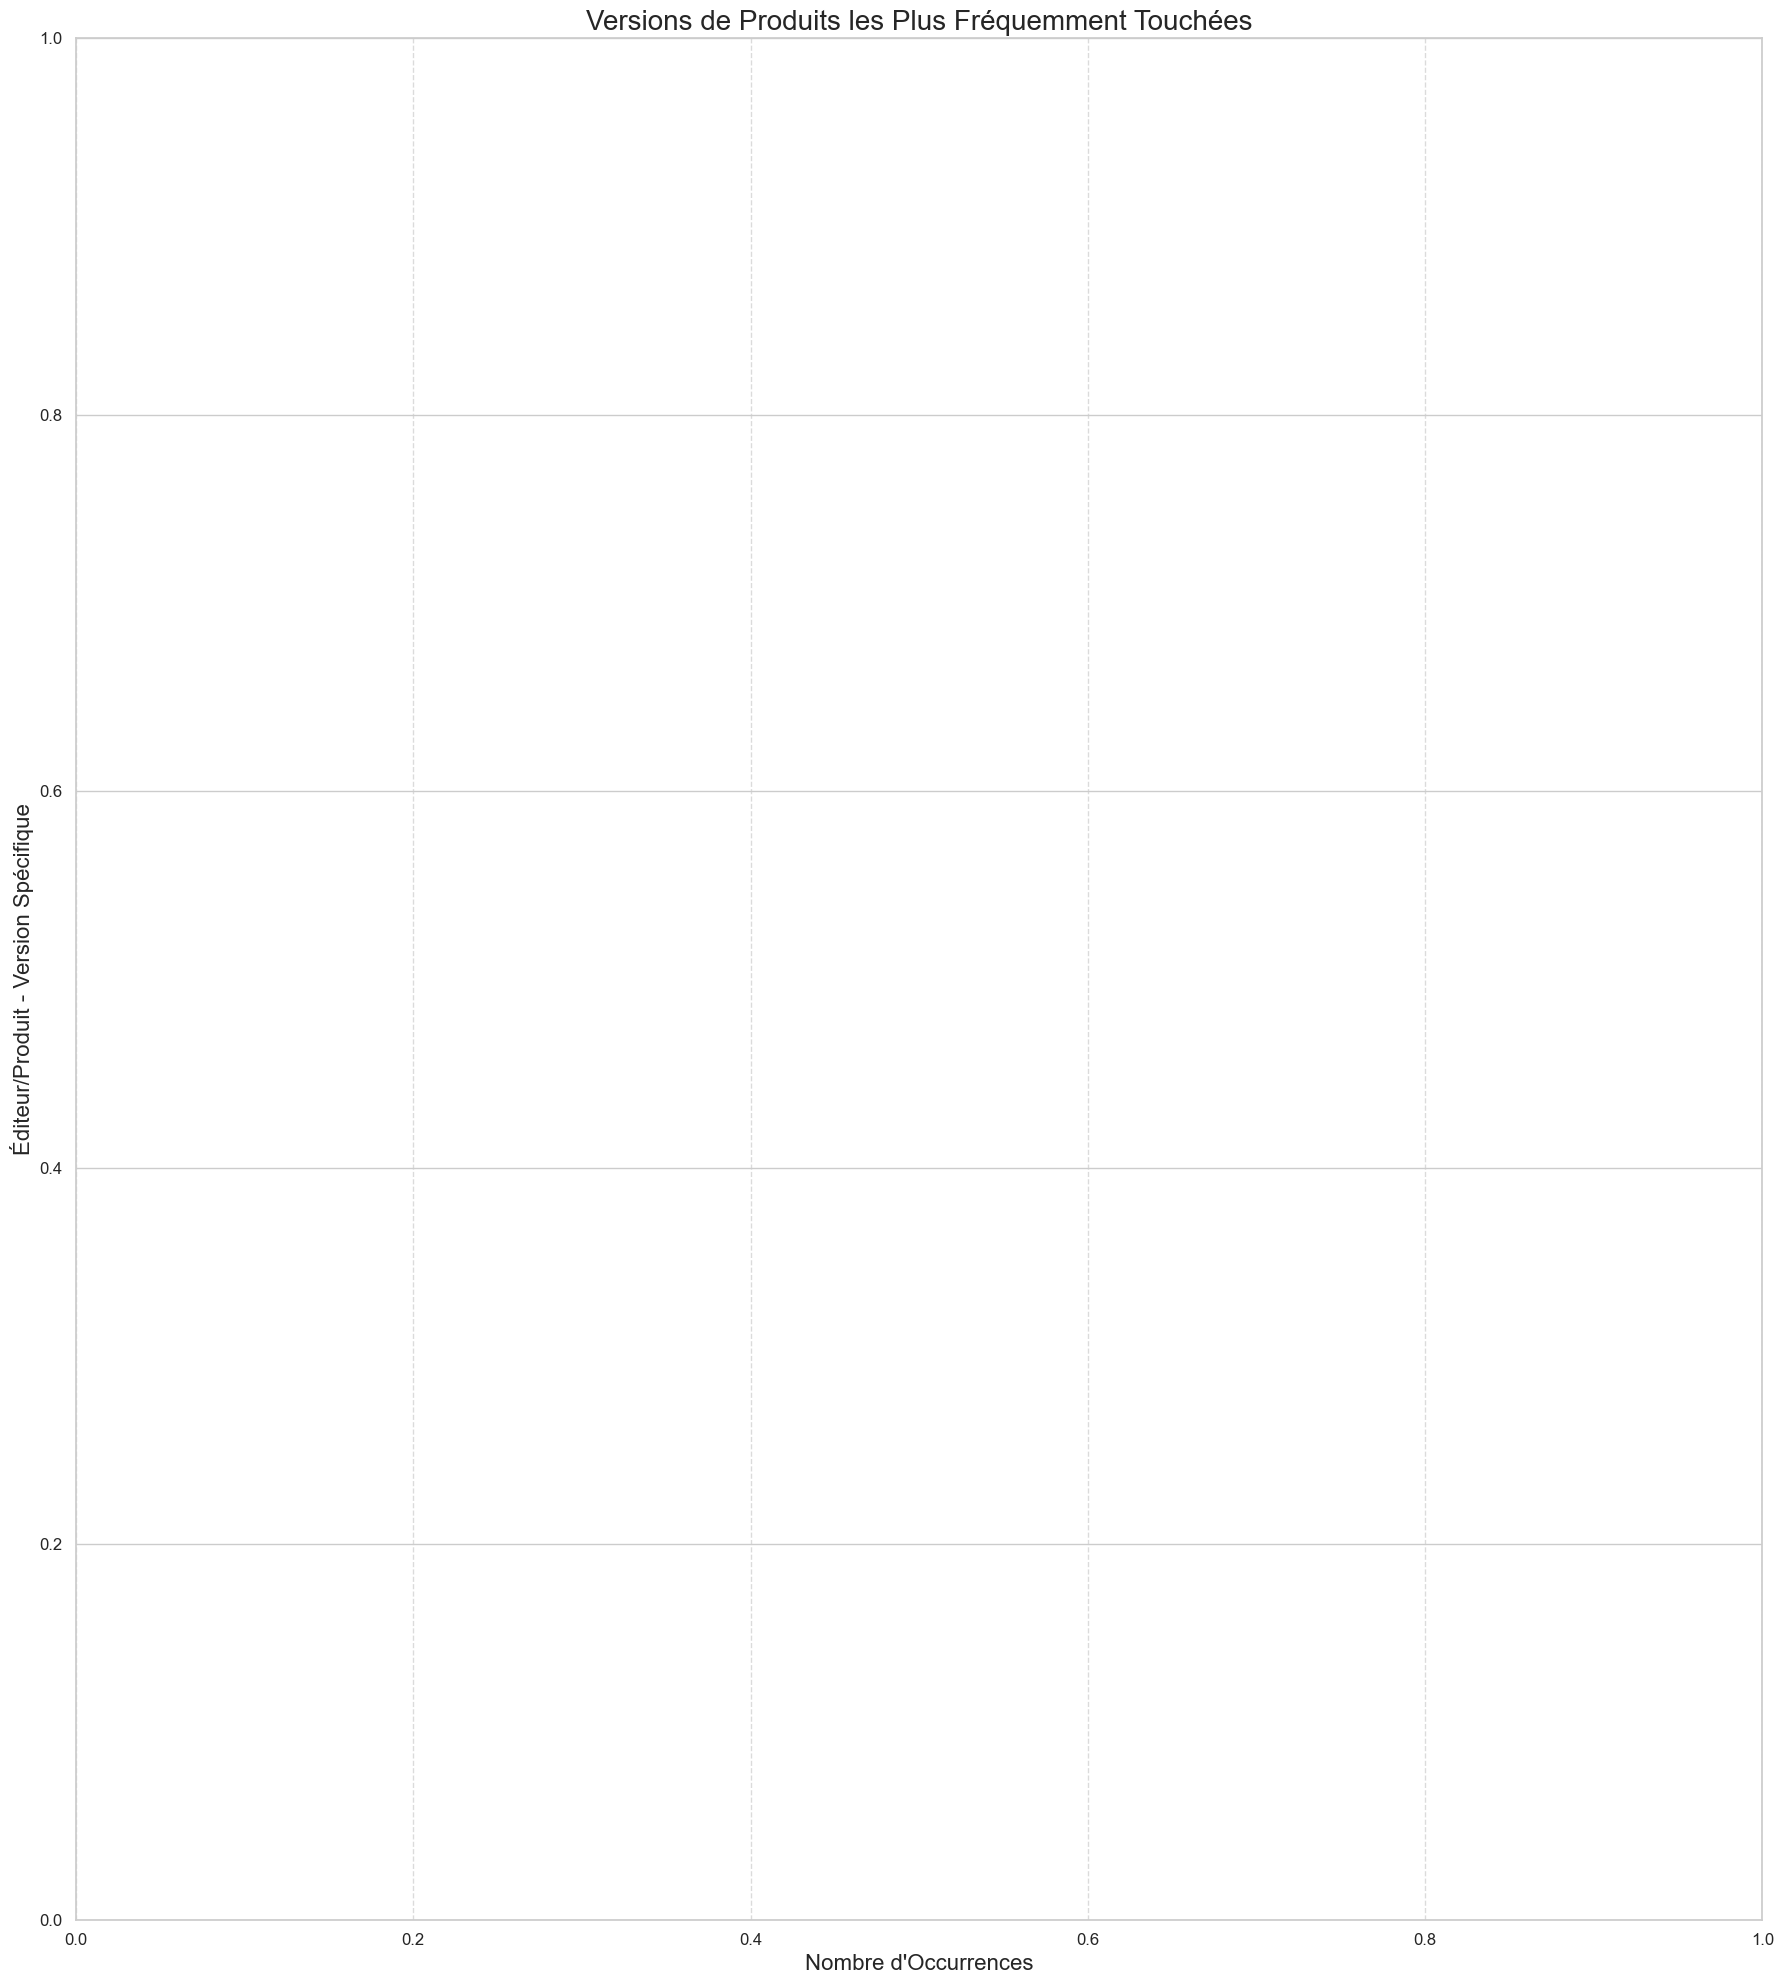

In [131]:
df_complet['version'] = df_complet['version'].apply( lambda x: [v.strip() for v in x.split(',')] if isinstance(x, str) else [])
df_exploded = df_complet.explode('version')

df_exploded['Produit_Version_Spécifique'] = \
    df_exploded['vendor'] + ' - ' + \
    df_exploded['product'] + ' - ' + \
    df_exploded['version']

version_counts = df_exploded.groupby(['Produit_Version_Spécifique', 'vendor']).size().reset_index(name='Nombre d\'Occurrences')
version_counts_df = version_counts.sort_values(by='Nombre d\'Occurrences', ascending=False)
plt.figure(figsize=(18, 20))

ax = sns.barplot(
    x='Nombre d\'Occurrences',
    y='Produit_Version_Spécifique',
    data=version_counts_df,
    hue='vendor',
    palette='rocket',
    dodge=False 
)

plt.title('Versions de Produits les Plus Fréquemment Touchées', fontsize=20)
plt.xlabel('Nombre d\'Occurrences', fontsize=16)
plt.ylabel('Éditeur/Produit - Version Spécifique', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

#ax.legend(title='vendor', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

# Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

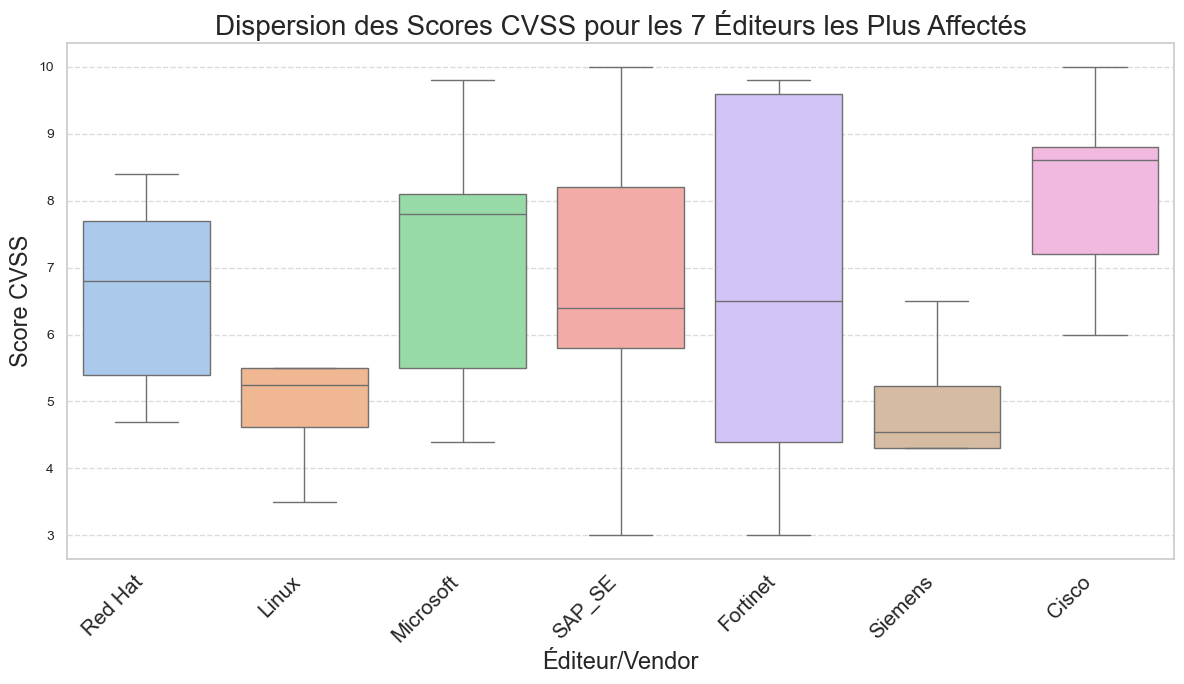

In [126]:
n_top_vendors = 7
top_vendors = df_complet['vendor'].value_counts().head(n_top_vendors).index
df_top_vendors = df_complet[df_complet['vendor'].isin(top_vendors)]
plt.figure(figsize=(12, 7)) 

sns.boxplot(
    data=df_top_vendors,
    x='vendor',
    y='CVSS_score',
    hue='vendor',
    palette='pastel',
    legend=False
)

plt.title(f'Dispersion des Scores CVSS pour les {n_top_vendors} Éditeurs les Plus Affectés', fontsize=20)
plt.xlabel('Éditeur/Vendor', fontsize=17)
plt.ylabel('Score CVSS', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()